In [1]:
# Lataa DataFrame "df" "silver_pipeline.ipynb" -tiedostosta
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Määritä polku DuckDB-tietokannalle
duckdb_path = "../data/duckdb.database"

# Määritä taulun nimi
table_name = "Silver_SensorData_lite"

# Muodosta yhteys DuckDB-tietokantaan
conn = duckdb.connect(database=duckdb_path)

# Lue tietokantataulu DataFrameen
df = conn.table(table_name).to_df()

conn.table(table_name).show()

# Sulje yhteys tietokantaan
conn.close()


┌─────────┬────────────────────────────┬───────┬───────┐
│ node_id │         timestamp          │   x   │   y   │
│  int32  │         timestamp          │ int32 │ int32 │
├─────────┼────────────────────────────┼───────┼───────┤
│    3200 │ 2019-03-07 13:46:19.078016 │     0 │     0 │
│    3200 │ 2019-03-07 13:46:20.078012 │     0 │     0 │
│    3200 │ 2019-03-07 13:46:21.078081 │     0 │     0 │
│    3200 │ 2019-03-07 13:46:22.07813  │     0 │     0 │
│    3200 │ 2019-03-13 17:29:43.686639 │   -50 │    50 │
│    3200 │ 2019-03-13 17:29:44.686592 │   -50 │    50 │
│    3200 │ 2019-03-13 17:29:45.686654 │   -50 │    50 │
│    3200 │ 2019-03-13 17:29:46.686785 │   -50 │    50 │
│    3200 │ 2019-03-13 17:29:47.687715 │   -50 │    50 │
│    3200 │ 2019-03-13 17:29:48.686671 │   -50 │    50 │
│      ·  │             ·              │     · │     · │
│      ·  │             ·              │     · │     · │
│      ·  │             ·              │     · │     · │
│    3200 │ 2019-03-13 20:16:18

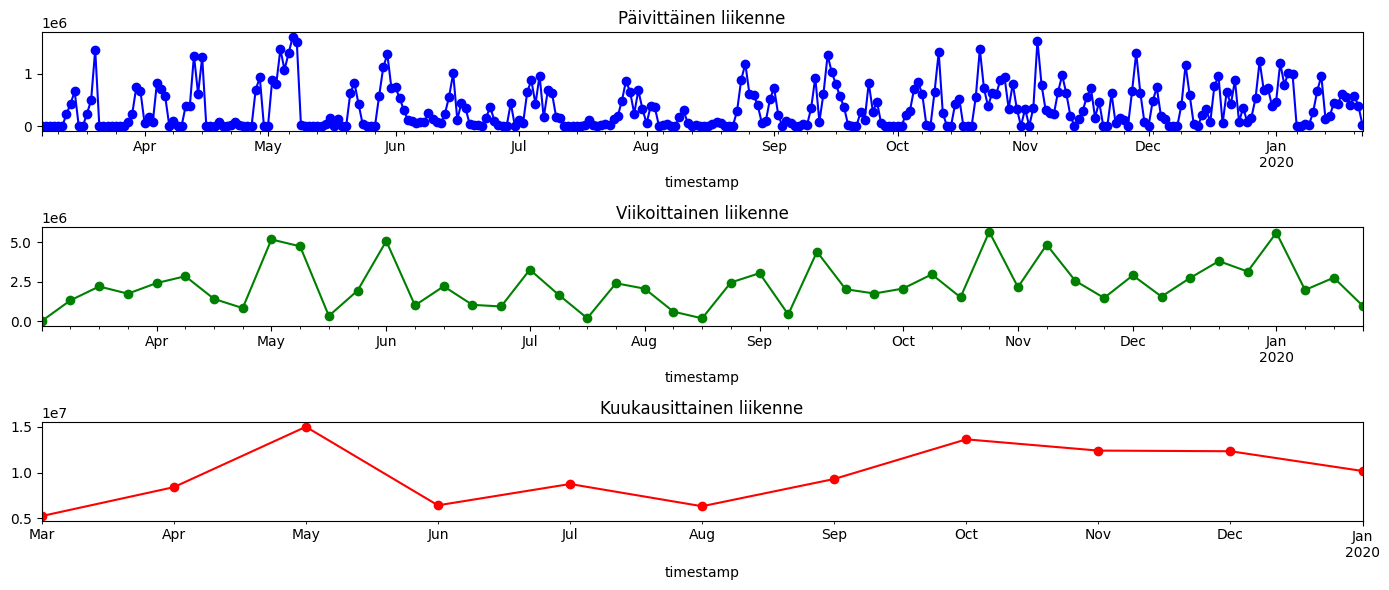

In [2]:
#Päivä-, viikko- ja kuukausitasoinen liikennöinti

# Luo kopion DataFramesta ja asettaa timestamp sarakeen indeksiksi
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)

# Päiväliikenne
paiva_liikenne = df_copy.resample('D').size()

# Viikkoliikenne
viikko_liikenne = df_copy.resample('W').size()

# Kuukausiliikenne
kuukausi_liikenne = df_copy.resample('M').size()

# Piirretään liikennetiedot
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
paiva_liikenne.plot(title='Päivittäinen liikenne', color='blue', marker='o')

plt.subplot(3, 1, 2)
viikko_liikenne.plot(title='Viikoittainen liikenne', color='green', marker='o')

plt.subplot(3, 1, 3)
kuukausi_liikenne.plot(title='Kuukausittainen liikenne', color='red', marker='o')

plt.tight_layout()
plt.show()


In [3]:
# Datan ajallinen täsmällisyys (näytevälin dt keskiarvo ja keskihajonta)

# Laskee aikaleimojen erotukset
erotukset = df['timestamp'].diff()

# Laskee näytevälin keskiarvo ja keskihajonta
keskiarvo = erotukset.mean()
keskihajonta = erotukset.std()

# Kuinka usein näyte otetaan
print("Näytevälin keskiarvo:", keskiarvo)
# Näytää keskihajonnan
print("Näytevälin keskihajonta:", keskihajonta)
# Suuri keskihajonta voi osittaa näytteiden oton epäsäännöllisyydestä tai että havaintojen välillä on suuria eroja

Näytevälin keskiarvo: 0 days 00:00:00.257157
Näytevälin keskihajonta: 0 days 03:09:08.111590


In [4]:
# Läpimenoaikojen tilastointi ( Tätä pitää vielä hiota ja viilailla :| )

df.index = pd.to_datetime(df.index)

# Laskee läpimenoaika timestamp-sarakkeen perusteella
df['läpimenoaika'] = df['timestamp'].diff().dt.total_seconds() / 60  # erotus minuutteina

# Ryhmittelee data aukioloajan tunteina ja päivinä
ryhmitelty = df.groupby([df.index.dayofweek, df.index.hour])

# Laskee tilastollisia tunnuslukuja läpimenoajoista
tilastot = ryhmitelty['läpimenoaika'].describe()

# Tulostaa tilastot
print("Tilastolliset tunnusluvut läpimenoajoista:")
print(tilastot)


Tilastolliset tunnusluvut läpimenoajoista:
           count      mean         std            min       25%       50%  \
3 0  107935514.0  0.004286  189.135193 -462607.456683  0.016661  0.016667   

          75%          max  
3 0  0.016673  9585.666797  
